In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime

In [2]:
API_KEY = 'ddI6wJUdt_Qdg4SAfbpX9rpt56YXnRID'
TICKER = 'AMZN'
NEWS_URL = 'https://api.polygon.io/v2/reference/news?limit=100&order=descending&sort=published_utc&ticker={}&published_utc.gte={}&apiKey={}'
INFO_URL = "https://api.polygon.io/vX/reference/tickers/{}?&apiKey={}"
DATA_URL = "https://api.polygon.io/v2/aggs/ticker/{}/range/1/day/{}/{}?unadjusted=false&sort=asc&limit=50000&apiKey={}"

In [3]:
START_DATE = '2020-01-01'
END_DATE = '2020-01-31'

In [4]:
info_response = requests.get(INFO_URL.format(TICKER, API_KEY))
if not info_response.ok:
    print('Failed info fetch.')
info_response.json()['results']

{'ticker': 'AMZN',
 'name': 'Amazon.Com Inc',
 'market': 'stocks',
 'locale': 'us',
 'primary_exchange': 'XNAS',
 'type': 'CS',
 'active': True,
 'currency_name': 'usd',
 'cik': '0001018724',
 'composite_figi': 'BBG000BB0MN8',
 'share_class_figi': 'BBG001S5PQL7',
 'last_updated_utc': '2021-05-27T00:00:00Z',
 'outstanding_shares': 504320000,
 'market_cap': 1625458662400.0,
 'phone_number': '(206) 266-1000',
 'address': {'address1': '410 Terry Avenue North',
  'city': 'Seattle,',
  'state': 'WA'},
 'sic_code': '5961',
 'sic_description': 'RETAIL-CATALOG & MAIL-ORDER HOUSES',
 'ticker_root': 'AMZN'}

In [5]:
current_url = NEWS_URL.format(TICKER, START_DATE, API_KEY)
all_results = []
while True:
    response = requests.get(current_url) 
    if not response.ok:
        print('Failed fetch')
        raise ValueError()
    response = response.json()
    results = response['results']
    all_results.extend(results)
    if 'next_url' not in response:
        break
    else:
        current_url = response['next_url'] + '&apiKey={}'.format(API_KEY)
        print(current_url)

https://api.polygon.io:443/v2/reference/news?cursor=eyJsaW1pdCI6MTAwLCJzb3J0IjoicHVibGlzaGVkX3V0YyIsIm9yZGVyIjoiZGVzY2VuZGluZyIsInRpY2tlciI6eyJlcSI6IkFNWk4ifSwicHVibGlzaGVkX3V0YyI6eyJndGUiOiIyMDIwLTAxLTAxIn0sInNlYXJjaF9hZnRlciI6WzE2MjE4NjIyMjAwMDAsbnVsbF19&apiKey=ddI6wJUdt_Qdg4SAfbpX9rpt56YXnRID
https://api.polygon.io:443/v2/reference/news?cursor=eyJsaW1pdCI6MTAwLCJzb3J0IjoicHVibGlzaGVkX3V0YyIsIm9yZGVyIjoiZGVzY2VuZGluZyIsInRpY2tlciI6eyJlcSI6IkFNWk4ifSwicHVibGlzaGVkX3V0YyI6eyJndGUiOiIyMDIwLTAxLTAxIn0sInNlYXJjaF9hZnRlciI6WzE2MjEyODcxMjAwMDAsbnVsbF19&apiKey=ddI6wJUdt_Qdg4SAfbpX9rpt56YXnRID
https://api.polygon.io:443/v2/reference/news?cursor=eyJsaW1pdCI6MTAwLCJzb3J0IjoicHVibGlzaGVkX3V0YyIsIm9yZGVyIjoiZGVzY2VuZGluZyIsInRpY2tlciI6eyJlcSI6IkFNWk4ifSwicHVibGlzaGVkX3V0YyI6eyJndGUiOiIyMDIwLTAxLTAxIn0sInNlYXJjaF9hZnRlciI6WzE2MjA2ODk5NTEwMDAsbnVsbF19&apiKey=ddI6wJUdt_Qdg4SAfbpX9rpt56YXnRID
https://api.polygon.io:443/v2/reference/news?cursor=eyJsaW1pdCI6MTAwLCJzb3J0IjoicHVibGlzaGVkX3V0YyIsIm9yZGVyI

In [6]:
news_data = pd.DataFrame(all_results).drop(columns=['id', 'tickers', 'keywords', 'amp_url', 'image_url', 'article_url', 'author', 'publisher',])
news_data['published_utc'] = pd.to_datetime(news_data['published_utc']).dt.normalize()
news_data = news_data.fillna('NONE')
news_data

,title,published_utc,description
0,Amazon investors reject New York retirement fu...,2021-05-28 00:00:00+00:00,Amazon.com Inc. investors rejected all 11 shar...
1,Is The Recent Sell-Off A Buying Opportunity Fo...,2021-05-28 00:00:00+00:00,"Josh Brown, CEO of Ritholtz Wealth Management,..."
2,"The buy now, pay later wave: Klarna, Affirm an...",2021-05-28 00:00:00+00:00,A new form of digital layaway has taken Europe...
3,Epic vs. Apple: The (predicted) verdict is in,2021-05-28 00:00:00+00:00,Though few expect the judge to force major cha...
4,Here's How Guidewire (GWRE) Looks Just Ahead o...,2021-05-28 00:00:00+00:00,Guidewire's (GWRE) fiscal third-quarter result...
...,...,...,...
639,2 Coiled Spring Blue-Chip Bargains To Buy Ahea...,2021-04-21 00:00:00+00:00,Earnings season can be a time of incredible vo...
640,Why Clean Energy Fuels Stock Dropped 22.1% Today,2021-04-20 00:00:00+00:00,Warrants given to Amazon as part of a supply d...
641,Wall Street Breakfast: Up In Smoke,2021-04-20 00:00:00+00:00,Listen on the go! A daily podcast of Wall Stre...
642,Why Clean Energy Fuels Stock Soared Today,2021-04-19 00:00:00+00:00,The alternative energy company announced a new...


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [8]:
scores_data = pd.DataFrame(news_data['description'].apply(vader.polarity_scores).tolist())
scores_data = pd.concat([news_data, scores_data], axis=1).drop(columns=['title'])
scores_data

,published_utc,description,neg,neu,pos,compound
0,2021-05-28 00:00:00+00:00,Amazon.com Inc. investors rejected all 11 shar...,0.052,0.824,0.124,0.2382
1,2021-05-28 00:00:00+00:00,"Josh Brown, CEO of Ritholtz Wealth Management,...",0.000,0.956,0.044,0.4939
2,2021-05-28 00:00:00+00:00,A new form of digital layaway has taken Europe...,0.033,0.855,0.112,0.5106
3,2021-05-28 00:00:00+00:00,Though few expect the judge to force major cha...,0.000,0.948,0.052,0.2732
4,2021-05-28 00:00:00+00:00,Guidewire's (GWRE) fiscal third-quarter result...,0.000,0.754,0.246,0.6369
...,...,...,...,...,...,...
639,2021-04-21 00:00:00+00:00,Earnings season can be a time of incredible vo...,0.045,0.838,0.117,0.5574
640,2021-04-20 00:00:00+00:00,Warrants given to Amazon as part of a supply d...,0.000,0.698,0.302,0.6705
641,2021-04-20 00:00:00+00:00,Listen on the go! A daily podcast of Wall Stre...,0.000,1.000,0.000,0.0000
642,2021-04-19 00:00:00+00:00,The alternative energy company announced a new...,0.000,0.696,0.304,0.7184


<AxesSubplot:xlabel='published_utc'>

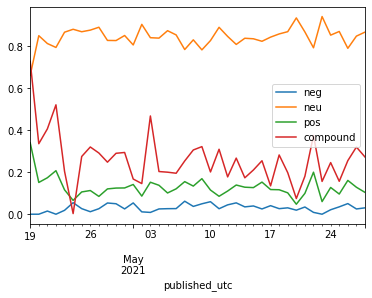

In [9]:
agg_scores_data = scores_data.groupby(['published_utc']).mean()
agg_scores_data.plot()

In [10]:
response = requests.get(DATA_URL.format(TICKER, str(agg_scores_data.index.date[0]), str(agg_scores_data.index.date[-1]), API_KEY))
if not response.ok:
    print('Fetch failed')
    raise ValueError()
response = response.json()

In [11]:
ohlc_data = pd.DataFrame(response['results'])
ohlc_data['t'] = pd.to_datetime(ohlc_data['t'], unit='ms').dt.normalize()
ohlc_data = ohlc_data.set_index('t')
ohlc_data

,v,vw,o,c,h,l,n
t,,,,,,,
2021-04-19,2725405.0,3385.8229,3390.3300,3372.01,3435.9333,3360.1600,148916
2021-04-20,2623032.0,3339.6960,3373.6000,3334.69,3382.9900,3316.0000,143655
2021-04-21,2210945.0,3344.1990,3316.0000,3362.02,3362.8600,3303.8061,121428
2021-04-22,2576950.0,3334.7739,3371.6800,3309.04,3372.8700,3301.4500,141914
2021-04-23,3196612.0,3345.6811,3319.1000,3340.88,3375.0000,3308.5000,136899
2021-04-26,4880708.0,3390.1659,3348.0000,3409.00,3428.4500,3330.9400,229396
2021-04-27,3827140.0,3424.6683,3443.4700,3417.43,3460.0000,3398.0100,182726
2021-04-28,4631884.0,3467.6796,3434.8000,3458.50,3489.8800,3425.0000,220336
2021-04-29,7682381.0,3506.4921,3505.0981,3471.31,3514.4450,3435.0000,377685


In [23]:
agg_scores_data.index = pd.to_datetime(agg_scores_data.index.date)

<AxesSubplot:>

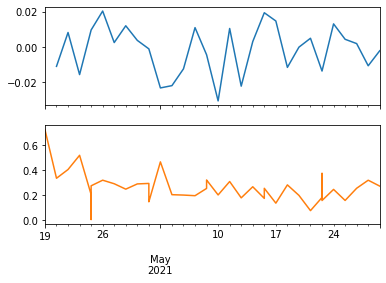

In [25]:
fig, axs = plt.subplots(2,1, sharex=True)
ohlc_data['c'].pct_change().plot(ax=axs[0], c='C0')
agg_scores_data['compound'].plot(ax=axs[1], c='C1')